**Aim: To predict the Loan Default based on Credit Risk Analysis**

**About the Dataset:**

'Credit Risk Analysis' dataset provides essential information about the loan applicants and the factors that contribute to credit risk. The following features inside the dataset helps to develop predictive models to find out the loan defaulters as well as to decide on the loan approvals and loan extensions.

**ID:** Unique identifier for each loan applicant.

**Age:** Age of the loan applicant.

**Income:** Income of the loan applicant.

**Home:** Home ownership status (Own,Mortgage,Rent,other).

**Emp_Length:** Employment length in years.

**Intent:** Purpose of the loan (Education,Medical,Venture,Personal,Debt Consolidation,Home Improvement).

**Amount:** Loan amount applied for.

**Rate:** Interest rate on the loan.

**Status:** Loan approval status.

**Percent_Income:** Loan amount as a percentage of income.

**Default:** Whether the applicant has defaulted on a loan previously (Yes, No)

**Cred_Length:** Length of the applicant's credit history.

# **I) Exploratory Data Analysis**

**1) Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


**2) Read the Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/credit_risk.csv')
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


**3) Statistical Analysis**

In [ ]:
df.shape

(32581, 12)

Using `shape` function we obtained the number of rows=32581 and columns=12




The `describe()` function applies basic statistical computations on the dataset like extreme values, count of data points, standard deviation, etc. Any missing value or NaN value is automatically skipped in this function.

In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


`describe(include='all')` gives the quick summary of all the attributes including  categorical columns in the dataset.

In [ ]:
df.describe(include='all')

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581,31686.000000,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,16446,NaN,6453,NaN,NaN,NaN,NaN,26836,NaN
mean,16290.006139,27.734600,6.607485e+04,NaN,4.789686,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,9405.479594,6.348078,6.198312e+04,NaN,4.142630,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,0.000000,20.000000,4.000000e+03,NaN,0.000000,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,8145.000000,23.000000,3.850000e+04,NaN,2.000000,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,16290.000000,26.000000,5.500000e+04,NaN,4.000000,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,24435.000000,30.000000,7.920000e+04,NaN,7.000000,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
df.nunique()

Id                32581
Age                  58
Income             4295
Home                  4
Emp_length           36
Intent                6
Amount              753
Rate                348
Status                2
Percent_income       77
Default               2
Cred_length          29
dtype: int64

**4) Handling Missing Values**

In [ ]:
# To drop a column
df.drop(['Id'],axis=1,inplace=True)

`df.drop_duplicates()` is used to remove duplicate rows and `df.reset_index()` is used to change the index accordingly.

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [ ]:
# To check the missing values
df.isna().sum()

Age                  0
Income               0
Home                 0
Emp_length         887
Intent               0
Amount               0
Rate              3095
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [ ]:
# To fill the missing values using mean()
cols=['Emp_length','Rate']
for i in cols:
  df[i]=df[i].fillna(df[i].mean())

In [ ]:
# To recheck the missing values
df.isnull().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

**5) Data Visualization**

Data Visualization is used to analyse data in the form of graphs and to understand the trends or patterns of the attributes.

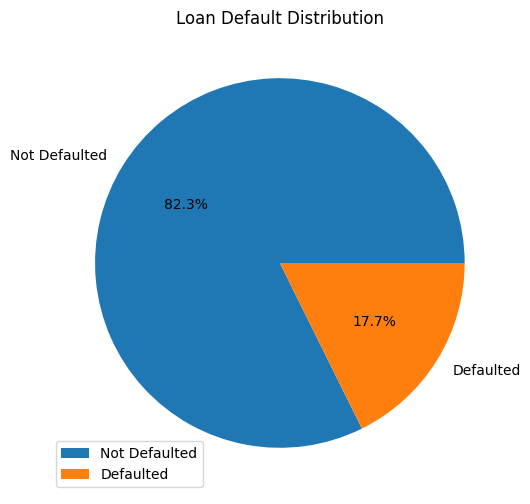

In [ ]:
# Loan Default Distribution
plt.figure(figsize=(8,6))
x=df['Default'].value_counts()
xlabel=['Not Defaulted','Defaulted']
plt.pie(x,labels=xlabel,autopct='%1.1f%%',textprops={'size': 'medium'}, radius=1)
plt.title('Loan Default Distribution')
plt.legend(loc='lower left')
plt.show()#

From the pie chart, it is evident that number of loan defaulters is more (82.3%) in the dataset.

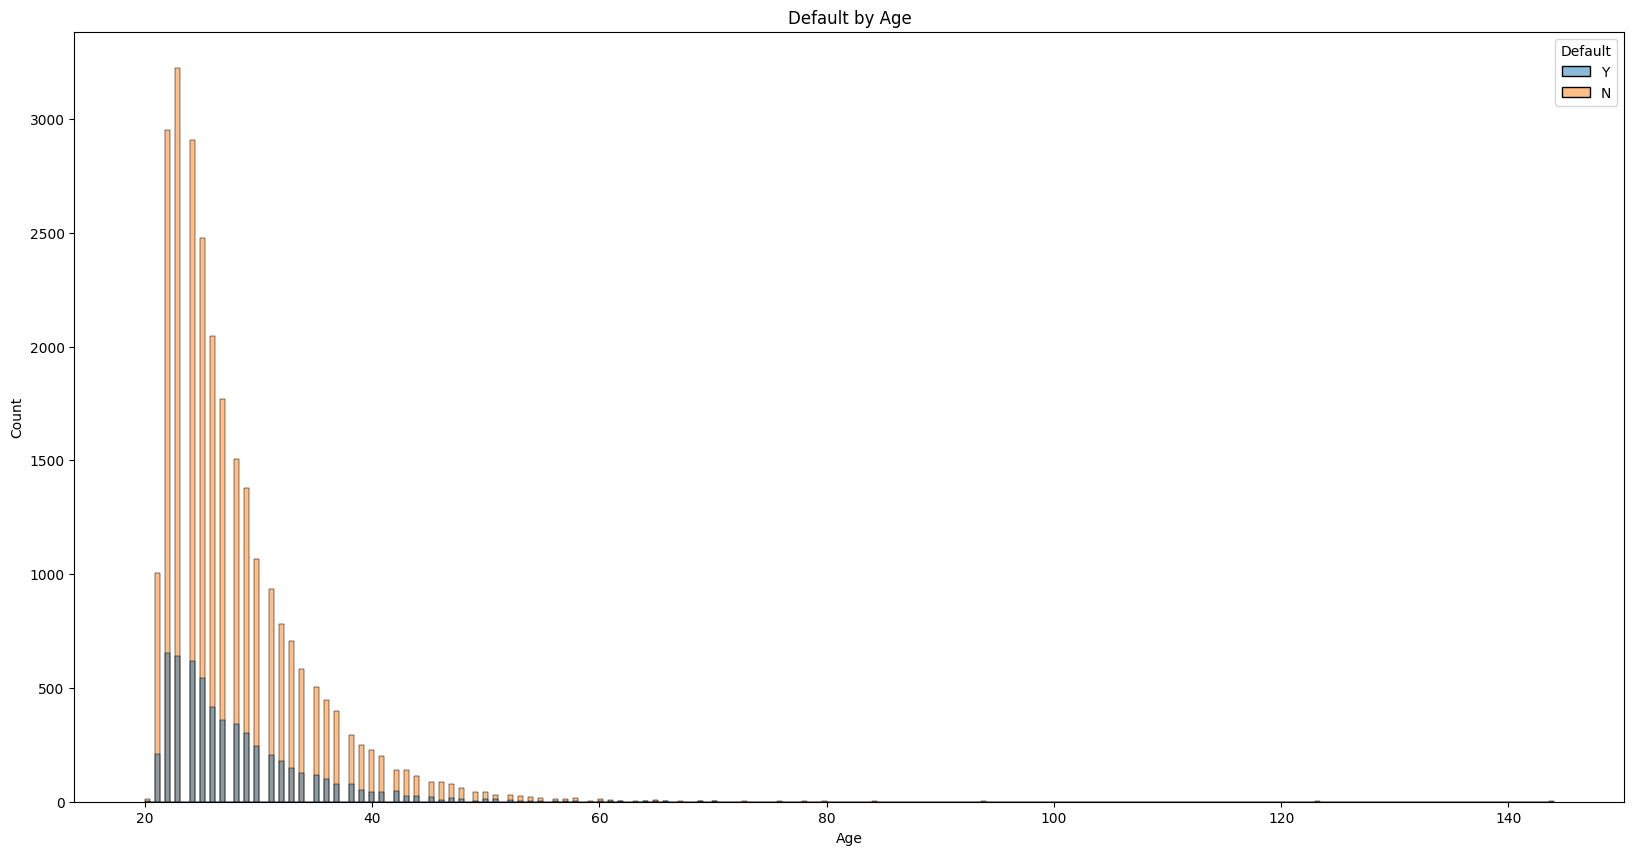

In [ ]:
# Default by Age
plt.figure(figsize=(20,10))
sns.histplot(x='Age',hue='Default',data=df)
plt.title('Default by Age')
plt.show()

The highest default rate is observed among the age group (20-40)


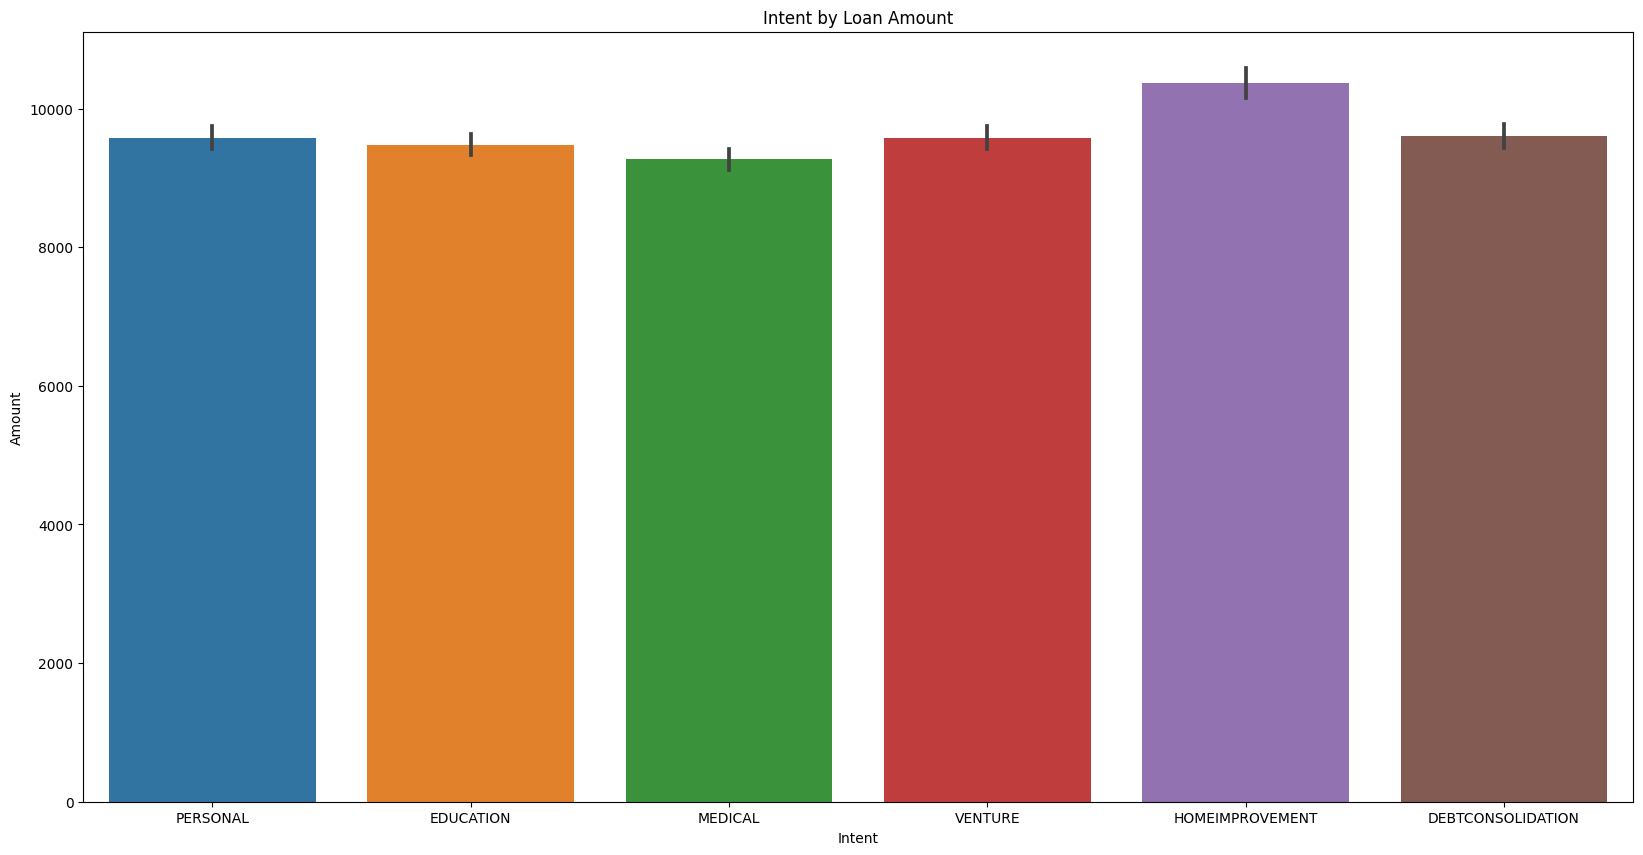

In [ ]:
# Intent by Loan Amount
plt.figure(figsize=(20,10))
sns.barplot(x='Intent',y='Amount',data=df)
plt.title('Intent by Loan Amount')
plt.show()


It is clear from the bar chart, the highest amount loans are taken for the home renovation.

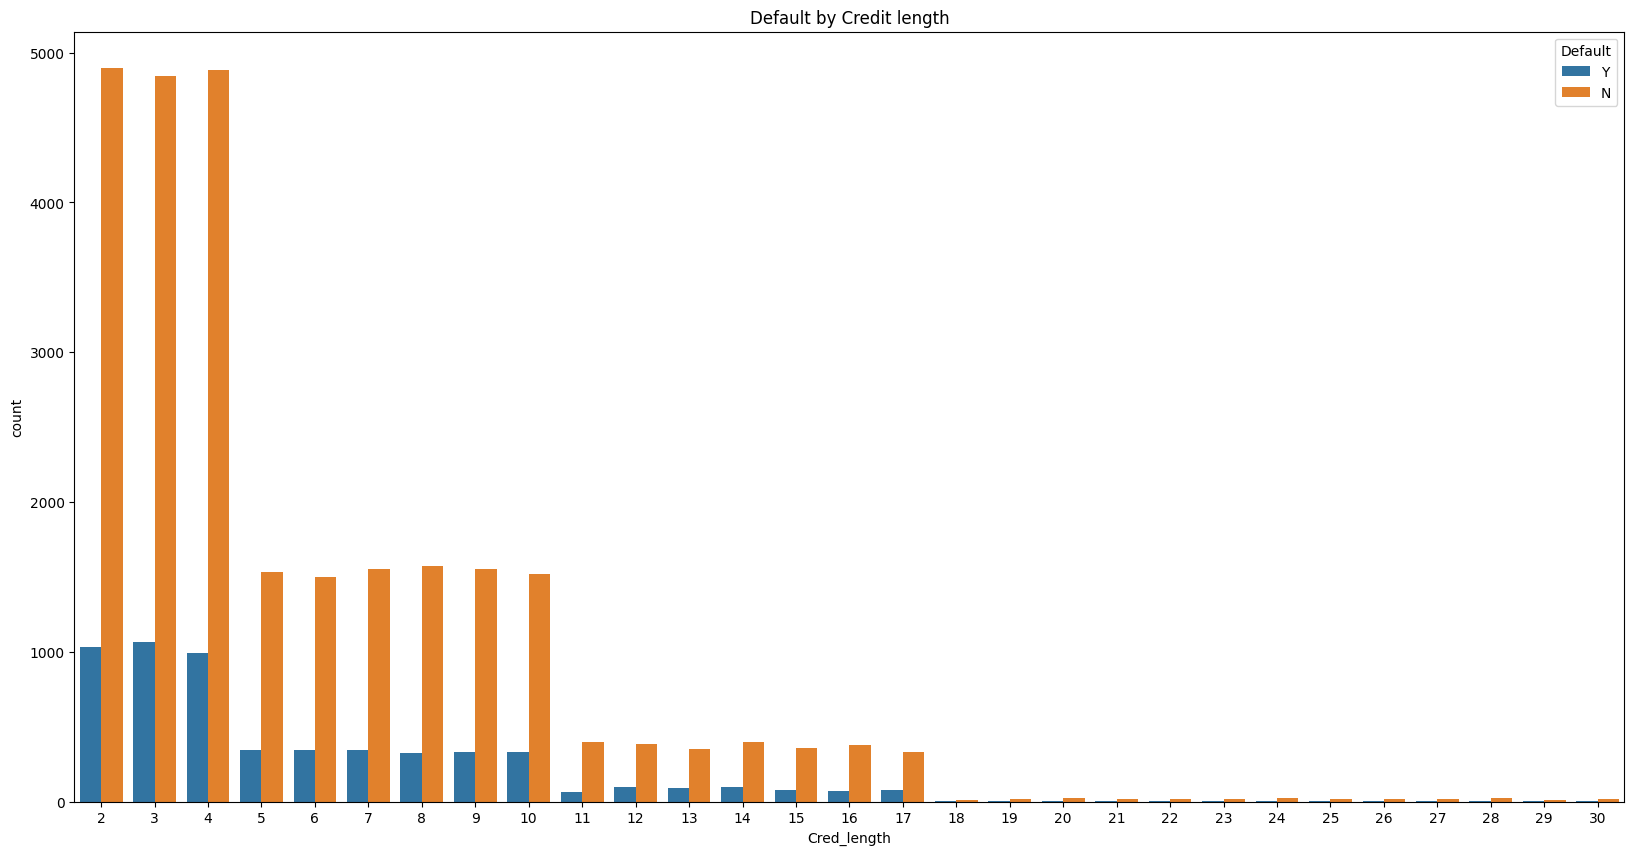

In [ ]:
# Default by Credit length
plt.figure(figsize=(20,10))
sns.countplot(x='Cred_length',hue='Default',data=df)
plt.title('Default by Credit length')
plt.show()

The loan defaulters are more in (0-4 years) domain of credit length.

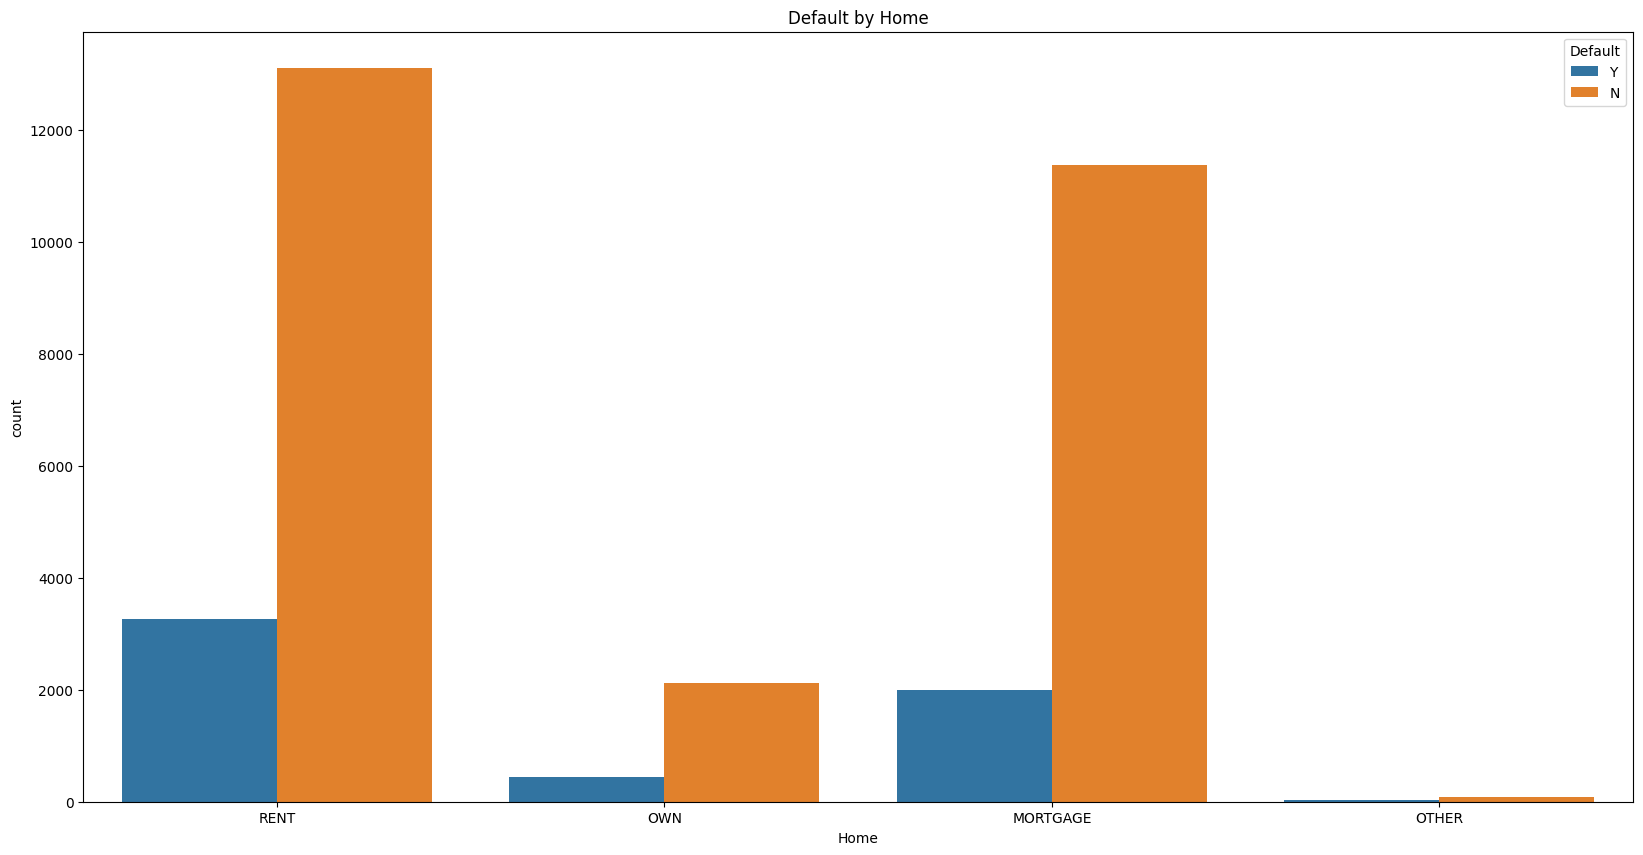

In [ ]:
# Default by Home
plt.figure(figsize=(20,10))
sns.countplot(x='Home',hue='Default',data=df)
plt.title('Default by Home')
plt.show()

Customers who stays in the rental homes have higher default rate.

**6) Data Encoding**

In [ ]:
df.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [ ]:
# to convert object datatype to numeric
le=LabelEncoder()
df['Home']=le.fit_transform(df['Home'])
df['Intent']=le.fit_transform(df['Intent'])
df['Default']=le.fit_transform(df['Default'])
df


,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32412,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19
32413,65,76000,3,3.0,2,35000,10.99,1,0.46,0,28
32414,56,150000,0,5.0,4,15000,11.48,0,0.10,0,26


**7) Feature Correlation**

In [ ]:
df.corr()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Age,1.000000,0.173293,-0.032734,0.161060,0.035639,0.050680,0.011100,-0.022698,-0.042300,0.005175,0.859215
Income,0.173293,1.000000,-0.203088,0.132999,0.001489,0.265947,0.000834,-0.145005,-0.254472,-0.003617,0.117614
Home,-0.032734,-0.203088,1.000000,-0.228874,0.010521,-0.131027,0.132957,0.211357,0.141852,0.063030,-0.025980
Emp_length,0.161060,0.132999,-0.228874,1.000000,0.020846,0.111870,-0.053036,-0.081302,-0.053012,-0.027746,0.143095
Intent,0.035639,0.001489,0.010521,0.020846,1.000000,-0.004763,-0.001332,-0.065851,0.000819,-0.004072,0.035544
Amount,0.050680,0.265947,-0.131027,0.111870,-0.004763,1.000000,0.139604,0.105736,0.572824,0.039341,0.041865
Rate,0.011100,0.000834,0.132957,-0.053036,-0.001332,0.139604,1.000000,0.320059,0.114419,0.477044,0.015032
Status,-0.022698,-0.145005,0.211357,-0.081302,-0.065851,0.105736,0.320059,1.000000,0.379697,0.179385,-0.016498
Percent_income,-0.042300,-0.254472,0.141852,-0.053012,0.000819,0.572824,0.114419,0.379697,1.000000,0.036204,-0.031457
Default,0.005175,-0.003617,0.063030,-0.027746,-0.004072,0.039341,0.477044,0.179385,0.036204,1.000000,0.004169


<Axes: >

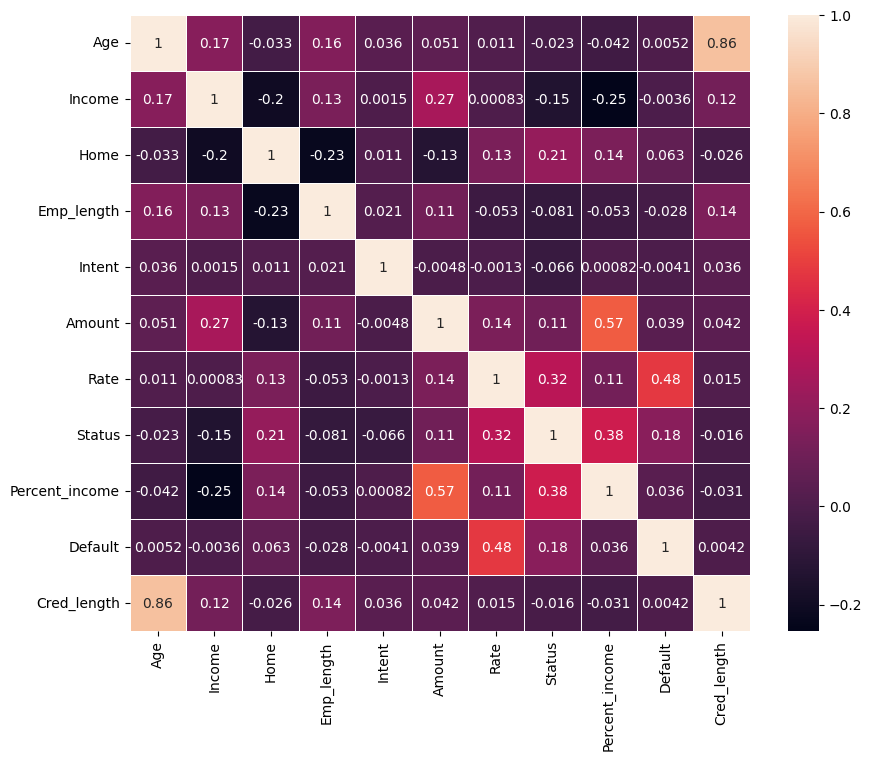

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

**8) Splitting data to X and y**

In [ ]:
X=df.drop(['Default'],axis=1)
X


,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...,...,...
32411,57,53000,0,1.0,4,5800,13.16,0,0.11,30
32412,54,120000,0,4.0,4,17625,7.49,0,0.15,19
32413,65,76000,3,3.0,2,35000,10.99,1,0.46,28
32414,56,150000,0,5.0,4,15000,11.48,0,0.10,26


In [ ]:
y=df.iloc[:,-2]
y

0        1
1        0
2        0
3        0
4        1
        ..
32411    0
32412    0
32413    0
32414    0
32415    0
Name: Default, Length: 32416, dtype: int64

**9) Scaling of the data**  

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled


array([[1.61290323e-02, 9.17278185e-03, 1.00000000e+00, ...,
        1.00000000e+00, 7.10843373e-01, 3.57142857e-02],
       [8.06451613e-03, 9.33955971e-04, 6.66666667e-01, ...,
        0.00000000e+00, 1.20481928e-01, 0.00000000e+00],
       [4.03225806e-02, 9.33955971e-04, 0.00000000e+00, ...,
        1.00000000e+00, 6.86746988e-01, 3.57142857e-02],
       ...,
       [3.62903226e-01, 1.20080053e-02, 1.00000000e+00, ...,
        1.00000000e+00, 5.54216867e-01, 9.28571429e-01],
       [2.90322581e-01, 2.43495664e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.20481928e-01, 8.57142857e-01],
       [3.70967742e-01, 6.33755837e-03, 1.00000000e+00, ...,
        0.00000000e+00, 1.80722892e-01, 1.00000000e+00]])

**10) Splitting data to train data and test data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

# **II) Building ML models**

**K-Nearest Neighbors**


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7988
           1       0.48      0.37      0.42      1737

    accuracy                           0.82      9725
   macro avg       0.68      0.64      0.65      9725
weighted avg       0.80      0.82      0.81      9725



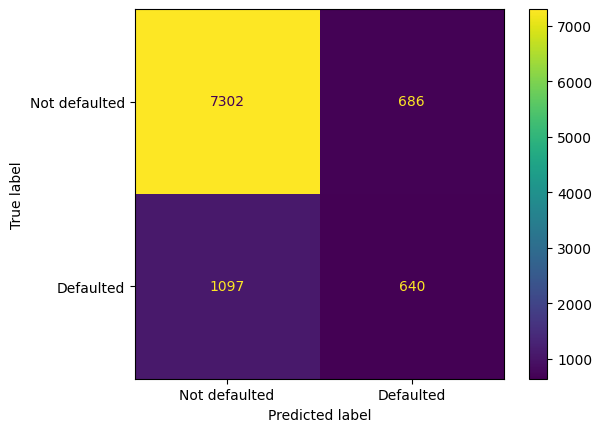

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))

**Support Vector Classifier**

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7988
           1       0.40      0.00      0.00      1737

    accuracy                           0.82      9725
   macro avg       0.61      0.50      0.45      9725
weighted avg       0.75      0.82      0.74      9725



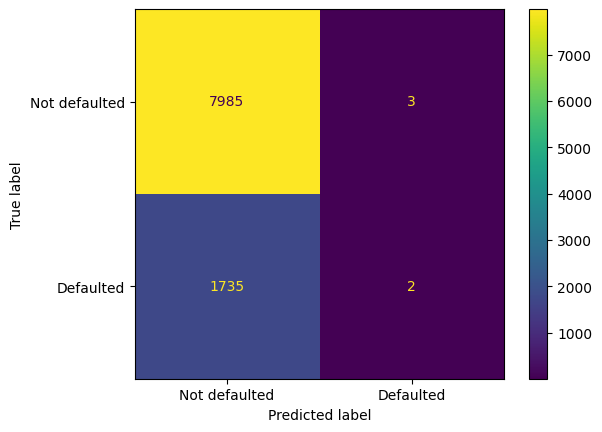

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))


**Naive Bayes**

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7988
           1       0.49      0.41      0.45      1737

    accuracy                           0.82      9725
   macro avg       0.68      0.66      0.67      9725
weighted avg       0.81      0.82      0.81      9725



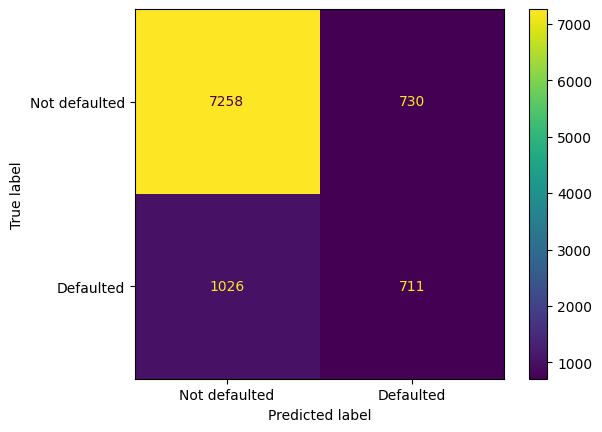

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))


**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7988
           1       0.52      0.29      0.37      1737

    accuracy                           0.83      9725
   macro avg       0.69      0.62      0.64      9725
weighted avg       0.80      0.83      0.81      9725



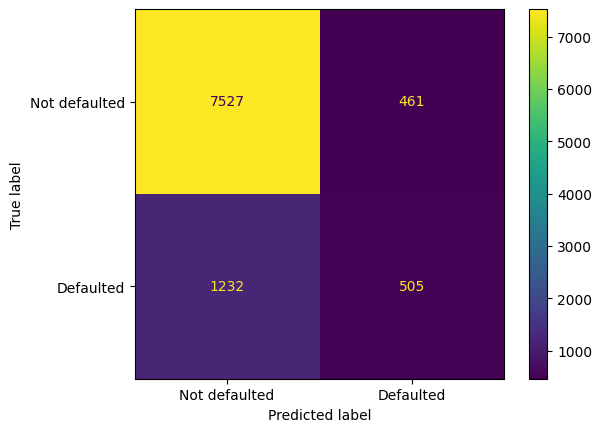

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7988
           1       0.51      0.41      0.46      1737

    accuracy                           0.83      9725
   macro avg       0.70      0.66      0.68      9725
weighted avg       0.81      0.83      0.82      9725



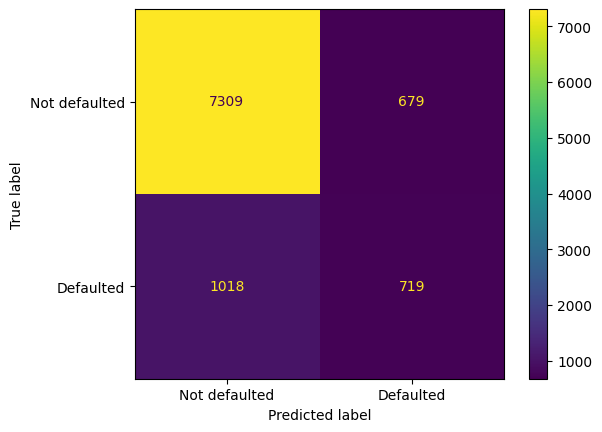

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))

**AdaBoost Classifier**


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7988
           1       0.51      0.53      0.52      1737

    accuracy                           0.82      9725
   macro avg       0.70      0.71      0.71      9725
weighted avg       0.83      0.82      0.83      9725



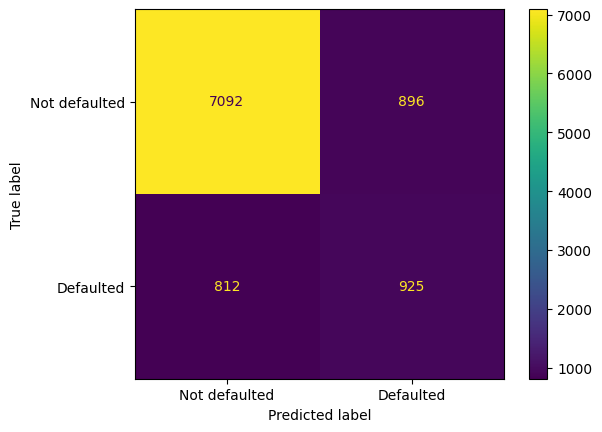

In [ ]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['Not defaulted','Defaulted']))

**Accuracy Comparison**

In [ ]:
Table1=pd.DataFrame({'Model':['KNN Classifier','SVC Classifier','Naive Bayes Classifier','Decision Tree Classifer','Random Forest Classifier','Adaboost Classifier'],'Accuracy':[0.82,0.82,0.82,0.83,0.83,0.82]})
Table1['Accuracy']= Table1['Accuracy']*100
Table1


,Model,Accuracy
0,KNN Classifier,82.0
1,SVC Classifier,82.0
2,Naive Bayes Classifier,82.0
3,Decision Tree Classifer,83.0
4,Random Forest Classifier,83.0
5,Adaboost Classifier,82.0


**Plotting Accuracy of Models**


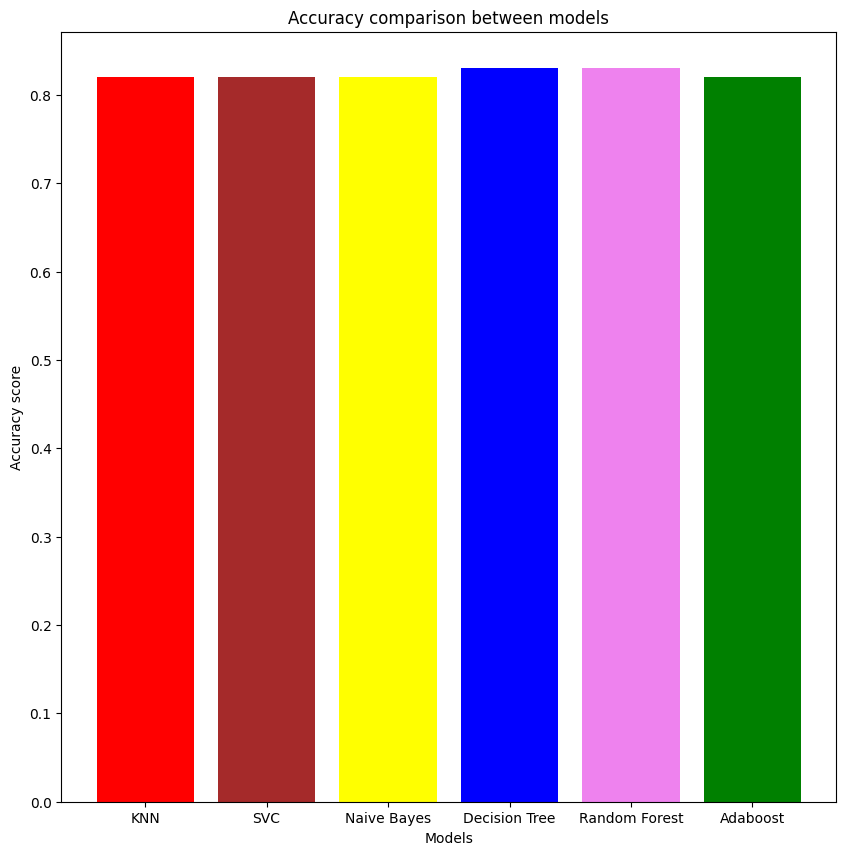

In [ ]:
plt.figure(figsize=(10,10))
Models=['KNN','SVC','Naive Bayes','Decision Tree','Random Forest','Adaboost']
Accuracy=[0.82,0.82,0.82,0.83,0.83,0.82]
plt.title('Accuracy comparison between models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.bar(Models,Accuracy,color=['red','brown','yellow','blue','violet','green'])
plt.show()

From the bar chart, it is evident that accuracy score of Decision Tree Classifier and Random Forest Classifier are higher.

# **Balancing the Dataset**

In [ ]:
y.value_counts()

0    26686
1     5730
Name: Default, dtype: int64

Given dataset is a imbalanced dataset. Because, the difference between the class labels are large. So, we have to balance the dataset.

**Oversampling**

In [ ]:
# Resampling of X and y
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
y_os.value_counts()

1    26686
0    26686
Name: Default, dtype: int64

Through oversampling synthetic points got generated in the minority dataset.

In [ ]:
# Splitting data to train and test data
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)


In [ ]:
# Data Scaling
X_train_os=scaler.fit_transform(X_train_os)
X_test_os=scaler.transform(X_test_os)


In [ ]:
# Model Building
knn1=KNeighborsClassifier()
svc1=SVC()
nb1=GaussianNB()
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
rf1=RandomForestClassifier(random_state=1)
ad1=AdaBoostClassifier()
lst=[knn1,svc1,nb1,dt1,rf1,ad1]
for i in lst:
  print('_'*50,i,'_'*50)
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))

__________________________________________________ KNeighborsClassifier() __________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7992
           1       0.81      0.89      0.85      8020

    accuracy                           0.84     16012
   macro avg       0.84      0.84      0.84     16012
weighted avg       0.84      0.84      0.84     16012

__________________________________________________ SVC() __________________________________________________
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      7992
           1       0.81      0.91      0.86      8020

    accuracy                           0.85     16012
   macro avg       0.85      0.85      0.85     16012
weighted avg       0.85      0.85      0.85     16012

__________________________________________________ GaussianNB() _________________________________________________

In [ ]:
# Accuracy Comparison
Table2=pd.DataFrame({'Model':['KNN Classifier','SVC Classifier','Naive Bayes Classifier','Decision Tree Classifer','Random Forest Classifier','Adaboost Classifier'],'Accuracy':[0.84,0.85,0.82,0.85,0.89,0.86]})
Table2['Accuracy']=Table2['Accuracy']*100
Table2

,Model,Accuracy
0,KNN Classifier,84.0
1,SVC Classifier,85.0
2,Naive Bayes Classifier,82.0
3,Decision Tree Classifer,85.0
4,Random Forest Classifier,89.0
5,Adaboost Classifier,86.0


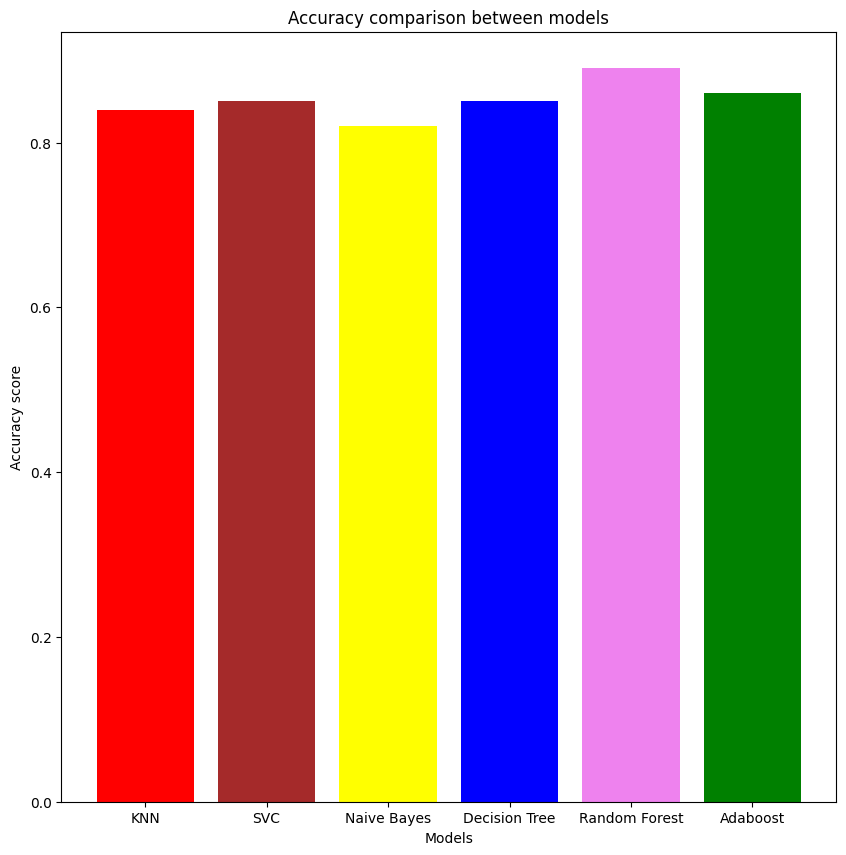

In [ ]:
# Plotting Accuracy of Models
plt.figure(figsize=(10,10))
Models=['KNN','SVC','Naive Bayes','Decision Tree','Random Forest','Adaboost']
Accuracy=[0.84,0.85,0.82,0.85,0.89,0.86]
plt.title('Accuracy comparison between models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.bar(Models,Accuracy,color=['red','brown','yellow','blue','violet','green'])
plt.show()


From the bar chart, it is evident that Accuracy of Random forest classifier is higher. In oversampling, except Naive Bayes Classifier, all the other models showed a slight increase in their accuracy score.

**Undersampling**

In [ ]:
y.value_counts()

0    26686
1     5730
Name: Default, dtype: int64

In [ ]:
# Resampling of X and y
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)


In [ ]:
y_us.value_counts()

0    5730
1    5730
Name: Default, dtype: int64

Through undersampling data points got deleted in the majority dataset.

In [ ]:
# Splitting data to train and test data
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
# Data Scaling
X_train_us=scaler.fit_transform(X_train_us)
X_test_us=scaler.transform(X_test_us)

In [ ]:
# Model Building
knn2=KNeighborsClassifier()
svc2=SVC()
nb2=GaussianNB()
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=4)
rf2=RandomForestClassifier(random_state=1)
ad2=AdaBoostClassifier()
lst=[knn2,svc2,nb2,dt2,rf2,ad2]
for i in lst:
  print('_'*50,i,'_'*50)
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))

__________________________________________________ KNeighborsClassifier() __________________________________________________
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1763
           1       0.75      0.83      0.79      1675

    accuracy                           0.78      3438
   macro avg       0.78      0.78      0.78      3438
weighted avg       0.78      0.78      0.78      3438

__________________________________________________ SVC() __________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1763
           1       0.79      0.88      0.83      1675

    accuracy                           0.82      3438
   macro avg       0.83      0.83      0.82      3438
weighted avg       0.83      0.82      0.82      3438

__________________________________________________ GaussianNB() _________________________________________________

In [ ]:
# Accuracy Comparison
Table3=pd.DataFrame({'Model':['KNN Classifier','SVC Classifier','Naive Bayes Classifier','Decision Tree Classifer','Random Forest Classifier','Adaboost Classifier'],'Accuracy':[0.78,0.82,0.80,0.85,0.84,0.83]})
Table3['Accuracy']=Table3['Accuracy']*100
Table3


,Model,Accuracy
0,KNN Classifier,78.0
1,SVC Classifier,82.0
2,Naive Bayes Classifier,80.0
3,Decision Tree Classifer,85.0
4,Random Forest Classifier,84.0
5,Adaboost Classifier,83.0


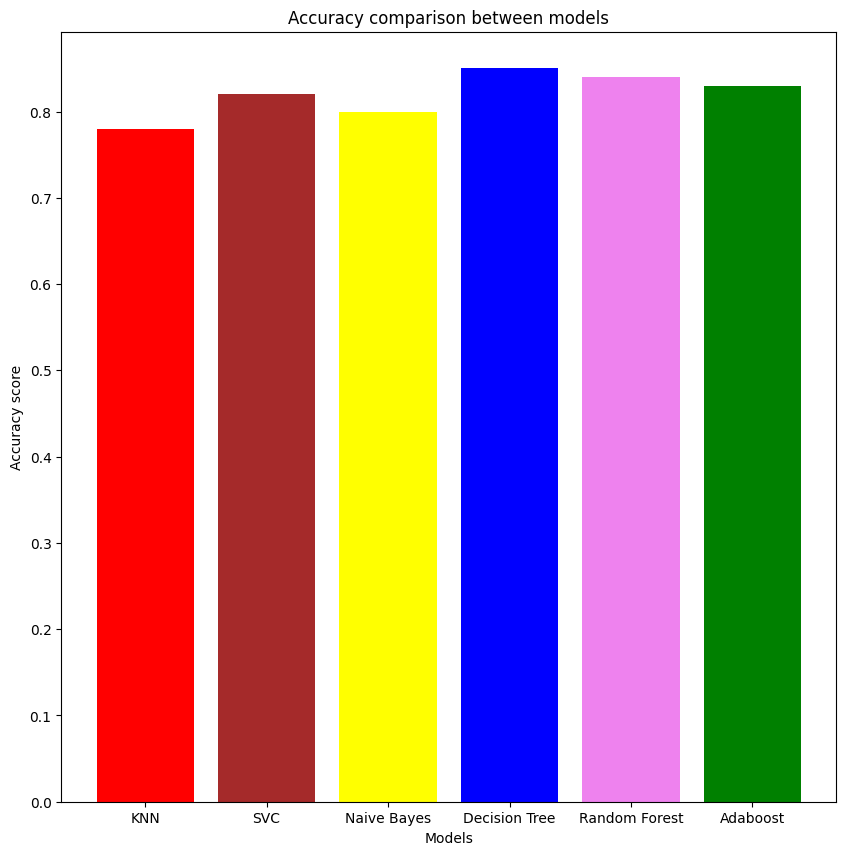

In [ ]:
# Plotting Accuracy of Models
plt.figure(figsize=(10,10))
Models=['KNN','SVC','Naive Bayes','Decision Tree','Random Forest','Adaboost']
Accuracy=[0.78,0.82,0.80,0.85,0.84,0.83]
plt.title('Accuracy comparison between models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.bar(Models,Accuracy,color=['red','brown','yellow','blue','violet','green'])
plt.show()


From the bar chart, it is evident that accuracy rate of Decision Tree Classifier is higher. Comparing to oversampling, the accuracy of every models except Random Forest Classifier have decreased in undersampling.

**Accuracy Comparison between the original, oversampled and undersampled datasets**.

In [ ]:
Table4=pd.DataFrame({'Model':['KNN Classifier','SVC Classifier','Naive Bayes Classifier','Decision Tree Classifer',
                          'Random Forest Classifier','Adaboost Classifier'],'Accuracy':[0.82,0.82,0.82,0.83,0.83,0.82],
                 'Oversampling':[0.84,0.85,0.82,0.85,0.89,0.86],'Under sampling':[0.78,0.82,0.80,0.85,0.84,0.83]})
Table4


,Model,Accuracy,Oversampling,Under sampling
0,KNN Classifier,0.82,0.84,0.78
1,SVC Classifier,0.82,0.85,0.82
2,Naive Bayes Classifier,0.82,0.82,0.80
3,Decision Tree Classifer,0.83,0.85,0.85
4,Random Forest Classifier,0.83,0.89,0.84
5,Adaboost Classifier,0.82,0.86,0.83


**Conclusion**

By comparing the performance measures of different algorithms in oversampling, Random
Forest Classifier is the most accurate model for this dataset.

# **III) Prediction of a new value**

In [ ]:
y_new=rf1.predict(scaler.transform([[24,54400,3,8.0,3,35000,14.27,1,0.55,4]]))
if y_new==0:
  print('Customer not defaulted')
else:
  print('Customer defaulted')


Customer defaulted
